In [146]:
import pandas as pd
import h5py
import numpy as np


df_train = pd.read_csv('..//data/processed_metadata_train.csv')
df_test = pd.read_csv('..//data/processed_metadata_test.csv')

In [147]:
df_train

image_id  identity                              path  bbox  \
0     d914a6c6d93c8df0         0  atrw_reid_train/train/004759.jpg   NaN   
1     8f4576ad85410442         0  atrw_reid_train/train/004648.jpg   NaN   
2     375c71349b295fbe         0  atrw_reid_train/train/001703.jpg   NaN   
3     2288f691b58edeca         0  atrw_reid_train/train/002558.jpg   NaN   
4     abec16f483abb4f1         0  atrw_reid_train/train/003997.jpg   NaN   
...                ...       ...                               ...   ...   
2923  876e1c59023b1a0e       274  atrw_reid_train/train/005152.jpg   NaN   
2924  ddeebdeefdb7e7e7       274  atrw_reid_train/train/002411.jpg   NaN   
2925  f80ff32e08a25270       274  atrw_reid_train/train/002086.jpg   NaN   
2926  df877f3865752637       274  atrw_reid_train/train/000533.jpg   NaN   
2927  061412e4a03c02f9       274  atrw_reid_train/train/000896.jpg   NaN   

                                              keypoints original_split  \
0     [ 194  233    2  204   85    2   59  362    2 ...          train   
1     [   0    0    0 1207  378    2 1245  448    2 ...          train   
2     [ 200  283    2  184  121    2   29  402    2 ...          train   
3     [ 215  243    2  242   85    2   98  348    2 ...          train   
4     [ 232  333    2  159  162    2   36  477    2 ...          train   
...                                                 ...            ...   
2923  [  0   0   0 585 103   2   0   0   0 468 175  ...          train   
2924  [462  96   2 456 105   2 487 197   2 363 178  ...          train   
2925  [572  73   2 576  91   2 606 180   2 403 145  ...          train   
2926  [  0   0   0 393  82   2 403 162   2 225 152  ...          train   
2927  [  0   0   0 428  99   2 457 180   2 274 153  ...          train   

                          processed_path  
0       ./data/segmented_dataset_train/0  
1       ./data/segmented_dataset_train/0  
2       ./data/segmented_dataset_train/0  
3       ./data/segmented_dataset_train/0  
4       ./data/segmented_dataset_train/0  
...                                  ...  
2923  ./data/segmented_dataset_train/274  
2924  ./data/segmented_dataset_train/274  
2925  ./data/segmented_dataset_train/274  
2926  ./data/segmented_dataset_train/274  
2927  ./data/segmented_dataset_train/274  

[2928 rows x 7 columns]

In [148]:
df_test

image_id  identity                              path  bbox  \
0    690bb330e5e7e3e0         0  atrw_reid_train/train/003791.jpg   NaN   
1    1cfead9959b76ce4         0  atrw_reid_train/train/003107.jpg   NaN   
2    1e4d36177d71bbb3         1  atrw_reid_train/train/001983.jpg   NaN   
3    f197002b9a0853ec         1  atrw_reid_train/train/001151.jpg   NaN   
4    3fe94a002317b5f9         3  atrw_reid_train/train/000316.jpg   NaN   
..                ...       ...                               ...   ...   
718  331cc28f8747a032       273  atrw_reid_train/train/004191.jpg   NaN   
719  d305281faf947ca7       273  atrw_reid_train/train/001870.jpg   NaN   
720  6e0721b2c6977135       274  atrw_reid_train/train/000783.jpg   NaN   
721  6e0e24295e8a8628       274  atrw_reid_train/train/002836.jpg   NaN   
722  70afbf2259b4449d       274  atrw_reid_train/train/004457.jpg   NaN   

                                             keypoints original_split  \
0    [  54  119    2  158   34    2   51  211    2 ...          train   
1    [ 140  239    2  194  103    2   52  349    2 ...          train   
2    [820 150   2 581 144   2 735 373   2 475 435  ...          train   
3    [812 104   2 833 143   2 910 259   2 690 375  ...          train   
4    [130  46   2   0   0   0   0   0   0   0   0  ...          train   
..                                                 ...            ...   
718  [ 16   7   2   0   0   0   0   0   0 190 173  ...          train   
719  [ 16  36   2   0   0   0   0   0   0 200 189  ...          train   
720  [360  74   2 383  95   2 375 169   2 204 154  ...          train   
721  [374 154   2 341 167   2 425 257   2 243 318  ...          train   
722  [557  78   2 548  89   2 580 179   2 378 151  ...          train   

                        processed_path  
0      ./data/segmented_dataset_test/0  
1      ./data/segmented_dataset_test/0  
2      ./data/segmented_dataset_test/1  
3      ./data/segmented_dataset_test/1  
4      ./data/segmented_dataset_test/3  
..                                 ...  
718  ./data/segmented_dataset_test/273  
719  ./data/segmented_dataset_test/273  
720  ./data/segmented_dataset_test/274  
721  ./data/segmented_dataset_test/274  
722  ./data/segmented_dataset_test/274  

[723 rows x 7 columns]

In [149]:
len(df_test['identity'].unique())


182

In [150]:
class_list = df_train['identity'].unique()
class_list = np.sort(class_list)

a = df_train['image_id'].values
b = df_train['identity'].values
b = list(map(str, b))
class_dict = dict(zip(a, b))

In [151]:
grouped_descriptors = {}
for class_ in class_list:
    grouped_descriptors[str(class_)] = {}

In [152]:
def load_keypoints_and_descriptors(keypoins_file, descriptors_file):
    data = {}
    with h5py.File(keypoins_file, 'r') as kf, h5py.File(descriptors_file, 'r') as df:
        for key in kf.keys():
            if key in df:
                keypoints = np.array(kf[key])
                descriptors = np.array(df[key])
                data[key] = (keypoints, descriptors)
            else:
                print(f"Key {key} not found in descriptors file.")
    return data

keypoints_file = "../data/feature_descriptors_train/keypoints.h5"
descriptors_file = "../data/feature_descriptors_train/descriptors.h5"

dataset = load_keypoints_and_descriptors(keypoints_file, descriptors_file)
print(f"Loaded dataset with {len(dataset)} images.")
    

Loaded dataset with 2928 images.


In [153]:
import sys
sys.path.append('../disk')
from collections import defaultdict
from disk.geom import distance_matrix
def create_class_dict(df, dataset):
    class_dict = defaultdict(list)

    for idx, row in df.iterrows():

        identity = str(row['identity'])
        image_id = row['image_id']

        descriptors  = dataset[image_id][1]
        keypoints = dataset[image_id][0]

        class_dict[identity].append({
            'image_id': image_id,
            'descriptor': descriptors,
            'keypoint': keypoints
        })

    return class_dict

class_dict = create_class_dict(df_train, dataset)

In [154]:
import torch
import numpy as np
from tqdm import tqdm
from collections import defaultdict
import h5py

MAX_FULL_MATRIX = 10000**2

def match_descriptors(desc_1, desc_2, rt=1.0):
    """
    Match descriptors between two sets using the DISK matcher.
    """
    chunk_size = MAX_FULL_MATRIX // desc_1.shape[0]
    matches = []
    start = 0

    while start < desc_2.shape[0]:
        ds2_chunk = desc_2[start:start+chunk_size]
        dist_m = distance_matrix(desc_1, ds2_chunk)
        val, ix = torch.topk(dist_m, k=2, dim=1, largest=False)
        ratio = val[:, 0] / val[:, 1]
        passed_test = ratio < rt
        ix2 = ix[passed_test, 0]
        matched = torch.stack([torch.nonzero(passed_test, as_tuple=False)[:, 0], ix2], dim=0)
        matches.append(matched)
        start += chunk_size

    if matches:
        matches = torch.cat(matches, dim=1)
    else:
        matches = torch.empty((2, 0), dtype=torch.long)

    return matches

def compute_class_averages(class_dict, rt=1.0):
    """
    For each class, use the first image as reference, match descriptors with other images,
    and compute the average of matched descriptors.
    """
    class_averages = {}

    for class_id, entries in tqdm(class_dict.items(), desc="Processing classes"):
        if len(entries) < 2:
            print(f"Class {class_id} has fewer than 2 images. Skipping...")
            continue

        # Use the first image's descriptors as the reference
        reference_entry = entries[0]
        ref_descriptors = torch.tensor(reference_entry['descriptor']).to('cuda' if torch.cuda.is_available() else 'cpu')

        all_matched_descriptors = []

        for entry in entries[1:]:
            # Match current image's descriptors with the reference
            cur_descriptors = torch.tensor(entry['descriptor']).to(ref_descriptors.device)
            matches = match_descriptors(ref_descriptors, cur_descriptors, rt)

            # Gather matched descriptors from the current image
            matched_desc = cur_descriptors[matches[1].cpu().numpy()]
            all_matched_descriptors.append(matched_desc.cpu().numpy())

        if all_matched_descriptors:
            # Stack all matched descriptors and compute the average
            all_matched_descriptors = np.vstack(all_matched_descriptors)
            class_average = np.mean(all_matched_descriptors, axis=0)
            class_averages[class_id] = class_average

    return class_averages

class_averages = compute_class_averages(class_dict, rt=1.0)

Processing classes: 100%|██████████| 182/182 [00:02<00:00, 82.12it/s]


In [155]:
len(class_averages.keys())

182

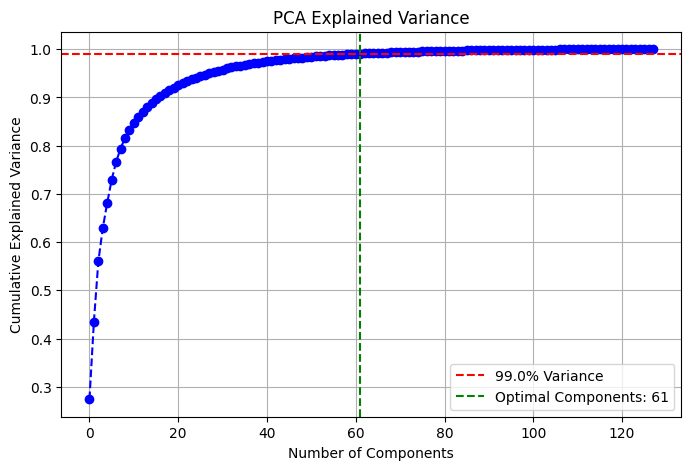

Optimal number of PCA components: 61


In [123]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def determine_optimal_pca_components(class_averages, variance_threshold=0.95, plot=False):

    # Stack all class average descriptors into a single matrix
    descriptors_matrix = np.stack(list(class_averages.values()))  # Shape: (num_classes, descriptor_dim)

    # Fit PCA to calculate explained variance
    pca = PCA()
    pca.fit(descriptors_matrix)

    # Calculate cumulative explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    # Find the number of components that meet the variance threshold
    optimal_components = np.searchsorted(cumulative_variance, variance_threshold) + 1

    if plot:
        # Plot cumulative explained variance
        plt.figure(figsize=(8, 5))
        plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
        plt.axhline(y=variance_threshold, color='r', linestyle='--', label=f"{variance_threshold*100}% Variance")
        plt.axvline(x=optimal_components, color='g', linestyle='--', label=f"Optimal Components: {optimal_components}")
        plt.xlabel("Number of Components")
        plt.ylabel("Cumulative Explained Variance")
        plt.title("PCA Explained Variance")
        plt.legend()
        plt.grid()
        plt.show()

    return optimal_components

# Determine optimal PCA components
optimal_components = determine_optimal_pca_components(
    class_averages,
    variance_threshold=0.99,
    plot=True
)
print(f"Optimal number of PCA components: {optimal_components}")


In [156]:
def apply_pca_dict(class_averages, n_components = 74):
    descriptors_matrix = np.stack([v for v in class_averages.values()])

    pca = PCA(n_components=n_components, whiten=True)
    pca.fit(descriptors_matrix)

    updated_dict = {}
    for class_id, data in class_averages.items():
        reduced_descriptor = pca.transform(data.reshape(1, -1))[0]
        updated_dict[class_id] = {'pca_descriptor' : reduced_descriptor}

    return updated_dict, pca

In [157]:
class_averages_pca, pca_model = apply_pca_dict(class_averages)

In [158]:
from sklearn.mixture import GaussianMixture
def train_gmm_from_dict(class_averages, n_components=2):
    
    # Stack all PCA-reduced descriptors for GMM training
    pca_descriptors_matrix = np.stack([v['pca_descriptor'] for v in class_averages.values()])

    gmm = GaussianMixture(n_components=n_components, covariance_type='diag', random_state=42)
    gmm.fit(pca_descriptors_matrix)

    # Update dictionary (optional: you can add GMM-related metadata here if needed)
    #updated_dict = class_averages  # No changes to the structure are necessary

    return gmm


In [159]:
gmm_dict = train_gmm_from_dict(class_averages_pca)

In [67]:
def determine_optimal_gmm_components(reduced_descriptors, max_components=10, criterion='bic', plot=False):

    criterion_values = []

    # Fit GMMs with different numbers of components and compute the criterion
    for n_components in range(1, max_components + 1):
        gmm = GaussianMixture(n_components=n_components, covariance_type='diag', random_state=42)
        gmm.fit(reduced_descriptors)
        
        if criterion == 'bic':
            value = gmm.bic(reduced_descriptors)
        else:  # criterion == 'aic'
            value = gmm.aic(reduced_descriptors)
        
        criterion_values.append(value)

    # Find the optimal number of components (minimum criterion value)
    optimal_components = range(1, max_components + 1)[np.argmin(criterion_values)]

    if plot:
        # Plot the criterion values
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, max_components + 1), criterion_values, marker='o', linestyle='--', color='b')
        plt.axvline(x=optimal_components, color='r', linestyle='--', label=f"Optimal Components: {optimal_components}")
        plt.xlabel("Number of GMM Components")
        plt.ylabel(f"{criterion.upper()} Value")
        plt.title(f"GMM {criterion.upper()} for Component Selection")
        plt.legend()
        plt.grid()
        plt.show()

    return optimal_components

In [98]:
# Determine optimal GMM components

#optimal_components = determine_optimal_gmm_components(
#    reduced_descriptors,
#   max_components=10,
#    criterion='aic',  # or 'aic'
#    plot=True
#)
#print(f"Optimal number of GMM components: {optimal_components}")


In [160]:
def compute_fisher_vectors(reduced_descriptors, gmm):
    means = gmm.means_
    covariances = gmm.covariances_
    weights = gmm.weights_

    fisher_vectors = []

    for x in reduced_descriptors:

        probs = gmm.predict_proba(x.reshape(1, -1)).flatten()

        diff = x - means
        mean_grad = probs[:, np.newaxis] * diff / np.sqrt(covariances)
        var_grad = probs[:, np.newaxis] * (diff ** 2 - covariances) / (2 * covariances ** 1.5)

        fisher_vector = np.concatenate([mean_grad.flatten(), var_grad.flatten()])
        fisher_vectors.append(fisher_vector)

    fisher_vectors = np.array(fisher_vectors)
    # Apply power normalization
    fisher_vectors = np.sign(fisher_vectors) * np.sqrt(np.abs(fisher_vectors))
    # Apply L2 normalization
    fisher_vectors = fisher_vectors / np.linalg.norm(fisher_vectors, axis=1, keepdims=True)

    return fisher_vectors

In [161]:
def compute_fisher_vectors_for_dict(class_averages, gmm):
    updated_dict = {}

    for class_id, data in class_averages.items():
        # Compute Fisher Vector for the PCA-reduced descriptor
        reduced_descriptor = data['pca_descriptor']
        fisher_vector = compute_fisher_vectors(reduced_descriptor.reshape(1, -1), gmm)[0]

        # Update the dictionary
        updated_dict[class_id] = {
            **data,  # Retain existing data
            'fisher_vector': fisher_vector
        }

    return updated_dict


In [162]:
#print("Computing Fisher Vectors...")
#fisher_vectors = compute_fisher_vectors(reduced_descriptors, gmm)
#print(f"Fisher Vectors computed. Shape: {fisher_vectors.shape}")
dict_fisher_vectors = compute_fisher_vectors_for_dict(class_averages_pca, gmm_dict)

In [163]:
import pickle

def save_class_averages_dict(class_averages, save_path):
    with open(save_path, 'wb') as f:
        pickle.dump(class_averages, f)
    print(f"Class averages dictionary saved to {save_path}.")


save_class_averages_dict(dict_fisher_vectors, '../data/fisher_vectors.pkl')

Class averages dictionary saved to ../data/fisher_vectors.pkl.


In [164]:
keypoints_file = "../data/feature_descriptors_test/keypoints.h5"
descriptors_file = "../data/feature_descriptors_test/descriptors.h5"

dataset_test = load_keypoints_and_descriptors(keypoints_file, descriptors_file)
print(f"Loaded dataset with {len(dataset_test)} images.")

Loaded dataset with 723 images.


In [165]:
class_test_dict = create_class_dict(df_test, dataset_test)

In [166]:
def process_test_descriptor(descriptor, pca, gmm):

    # Apply PCA to the descriptor
    reduced_descriptor = pca.transform(descriptor)

    # Compute the Fisher Vector
    fisher_vector = compute_fisher_vectors(reduced_descriptor, gmm)[0]  # Shape: (fisher_vector_dim,)

    return fisher_vector

In [167]:
from sklearn.metrics.pairwise import cosine_similarity

def reidentify_test_image(test_fisher_vector, class_averages):

    similarities = {}

    # Compute cosine similarity with each class Fisher Vector
    for class_id, data in class_averages.items():
        class_fisher_vector = data['fisher_vector']
        similarity = cosine_similarity(
            test_fisher_vector.reshape(1, -1),
            class_fisher_vector.reshape(1, -1)
        )[0, 0]
        similarities[class_id] = similarity

    # Sort matches by descending similarity
    top_matches = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    best_match = top_matches[0][0]  # Class ID with the highest similarity

    return best_match, top_matches

In [168]:
def reidentify_test_descriptors(test_dict, class_averages, pca, gmm):

    results = []

    for true_class, entries in test_dict.items():
        for entry in entries:
            descriptor = entry['descriptor']
            print(descriptor.shape)

            # Process the descriptor to get the Fisher Vector
            test_fisher_vector = process_test_descriptor(descriptor, pca, gmm)

            # Compute cosine similarity with each class's Fisher Vector
            best_match, top_matches = reidentify_test_image(test_fisher_vector, class_averages)

            # Save the result
            results.append((true_class, best_match, top_matches))

    return results


In [169]:
def evaluate_results(results, top_n=1):

    correct = 0
    total = len(results)

    for true_class, _, top_matches in results:
        # Check if the true class is in the top-N matches
        if any(str(class_id) == str(true_class) for class_id, _ in top_matches[:top_n]):
            correct += 1

    accuracy = correct / total
    print(f"Accuracy: {accuracy:.4f}")
    return accuracy

In [170]:
# Perform re-identification on the test set
print("Starting re-identification on the test set...")
results = reidentify_test_descriptors(class_test_dict, dict_fisher_vectors, pca_model, gmm_dict)

Starting re-identification on the test set...
(1635, 128)
(2118, 128)
(2091, 128)
(1808, 128)
(1926, 128)
(2731, 128)
(2134, 128)
(1887, 128)
(3061, 128)
(2777, 128)
(2528, 128)
(1642, 128)
(1809, 128)
(2153, 128)
(3113, 128)
(3460, 128)


(1842, 128)
(1993, 128)
(2259, 128)
(2196, 128)
(2585, 128)
(1780, 128)
(1677, 128)
(1398, 128)
(1945, 128)
(1134, 128)
(1395, 128)
(1537, 128)
(1466, 128)
(1439, 128)
(2436, 128)
(2812, 128)
(1379, 128)
(1554, 128)
(1751, 128)
(1636, 128)
(2353, 128)
(1751, 128)
(2582, 128)
(2469, 128)
(2501, 128)
(1940, 128)
(2359, 128)
(2351, 128)
(1745, 128)
(1780, 128)
(2417, 128)
(1274, 128)
(3381, 128)
(2249, 128)
(29, 128)
(1332, 128)
(2357, 128)
(2950, 128)
(2846, 128)
(3766, 128)
(2607, 128)
(1969, 128)
(1892, 128)
(3247, 128)
(3212, 128)
(1777, 128)
(1957, 128)
(2151, 128)
(1675, 128)
(1621, 128)
(3423, 128)
(1913, 128)
(1392, 128)
(2042, 128)
(1897, 128)
(1933, 128)
(1314, 128)
(1522, 128)
(2075, 128)
(1260, 128)
(1200, 128)
(1506, 128)
(1105, 128)
(1729, 128)
(1615, 128)
(2620, 128)
(2067, 128)
(2358, 128)
(4459, 128)
(3787, 128)
(3024, 128)
(2347, 128)
(1815, 128)
(1771, 128)
(3208, 128)
(1481, 128)
(1547, 128)
(1730, 128)
(1958, 128)
(2592, 128)
(2551, 128)
(2630, 128)
(2584, 128)
(2897,

In [171]:
for true_class, _, top_matches in results:
        print(true_class, top_matches)

0 [('55', np.float64(0.0716401971483386)), ('265', np.float64(0.05327693819633912)), ('177', np.float64(0.03874607992584902)), ('196', np.float64(0.037999175297140315)), ('148', np.float64(0.028490044279355718)), ('219', np.float64(0.016430315150318547)), ('72', np.float64(0.015260229601058519)), ('186', np.float64(0.00998490177186648)), ('246', np.float64(0.009492661098371172)), ('226', np.float64(0.0015605216942381035)), ('181', np.float64(0.001557318663400602)), ('123', np.float64(0.001482993598480972)), ('201', np.float64(-0.0005018524876244152)), ('4', np.float64(-0.0005462258176412333)), ('259', np.float64(-0.0005991910400425687)), ('190', np.float64(-0.0008822878121680797)), ('234', np.float64(-0.000969662799621728)), ('217', np.float64(-0.0011337229705692426)), ('228', np.float64(-0.0011971170811853674)), ('237', np.float64(-0.0012039587807557753)), ('153', np.float64(-0.0012346199006816596)), ('18', np.float64(-0.0012506668591514521)), ('159', np.float64(-0.0013439645531754)),

In [172]:
# Evaluate results
print("Evaluating results...")
accuracy = evaluate_results(results, top_n=5)

Evaluating results...
Accuracy: 0.0290
